<!--
# Introduction

Plotting is one of the most important tasks that engineers and scientists use computers for. 
Plots are used to:

- present and understand data; and
- to check computed results visually.

The most widely used Python module for plotting is Matplotlib (<http://matplotlib.org/>), and this is what we will use. Matplotlib is extremely powerful and we will use only a small fraction of its functionality.
The material in this notebook will provide you with a basis that you can build 
upon for more advanced plotting by searching online resources. A good place to start for 
a wide range of examples is the Matplotlib Gallery (http://matplotlib.org/gallery.html).

We will use the tools presented in this notebook to visualise results in subsequent notebooks.

> This is a long activity - this a reflection of the importance of plotting. The next activity
> is shorter in compensation.

> Some exercises in this notebook are challenging. Use the forum to get help.



## Why do we plot programmatically?

Producing plots via a program is very powerful. It allows you to explore and manipulate 
data in sophisticated ways. It also allows you to make plotting interactive; 
from a large and complex data
set you can design interfaces for you and others to query the data and have it displayed graphically, 
possibly over the Internet.
It also allows you to automate the fetching and processing of  data from online sources or 
from laboratory equipment.


## Objectives

- Introduction to a programmatic approach to plotting 
- Create line plots and bar charts from discrete data sets
- Create line plots of mathematical functions
- Create histograms for distribution-like data 
- Develop interactive plots
- Create contour plots of functions of two variables

> This notebook uses interactive widgets - you will need to execute the notebook to see the widgets.
-->

# 介绍

绘图是工程师和科学家使用计算机的最重要任务之一。
图形用于：

 - 展示和理解数据; 并且
 - 目视检查计算结果。

用于绘图的最广泛使用的Python模块是Matplotlib（<http://matplotlib.org/>），这就是我们将要使用的。 Matplotlib功能非常强大，我们只使用它的一小部分功能。
本笔记本中的材料将为您提供可以构建的基础，您还可以通过搜索在线资源进行更高级的绘图。
一个好的起点：
Matplotlib Gallery（http://matplotlib.org/gallery.html）提供了大量示例。

我们将使用此笔记本中提供的工具来显示后续笔记本中的结果。

>这是一项长期活动 - 这反映了绘图的重要性。下一项活动的补偿时间较短。

>这款笔记本中的一些练习很有挑战性。使用论坛获取帮助。



## 为什么我们以编程方式绘图？

通过程序生成图表非常强大。 它允许您以复杂的方式探索和操作数据。 它还允许您进行绘图交互; 从大型复杂的数据集中，您可以为您和其他人设计接口，以查询数据并以图形方式显示，还可能通过Internet完成上述工作。 它还允许您自动从在线资源或实验室设备获取和处理数据。

## 目标

 - 介绍绘图的程序化方法
 - 从离散数据集创建线图和条形图
 - 创建数学函数的线图
 - 为类似分布的数据创建直方图
 - 开发互动绘图
 - 创建两个变量函数的等高线图

>此笔记本使用交互式小部件 - 您需要执行笔记本才能看到小部件。

<!--
## Installing modules

In this notebook we will use the module `quandl` to fetch financial data from the Internet for plotting. 
Quandl is not  available by default in Python environments, so we need to install it. 
The usual way to install a module is:
```
!pip install module-name
```
If you are using the Anaconda Python environment, an alternative is: 
```
!conda install -yc conda-forge module-name
```

Below we install the `quandl` package which will be used further down to fetch and plot stock prices.
You can skip over the details, and it should just work. The code is a little complex because it is designed work for a range of different Python environments. If you get an error message in the following code blocks, send a message with the error to the Moodle forum.

To install the `quandl` package:
-->

## 安装模块

在这个笔记本中，我们将使用模块`quandl`从互联网上获取财务数据进行绘图。
默认情况下，Quandl在Python环境中不可用，因此我们需要安装它。
安装模块的常用方法是：
```
!pip install module-name
```
如果您使用的是Anaconda Python环境，则另一种方法是：
```
!conda install -yc conda-forge module-name
```

下面我们安装`quandl`包，它将进一步用于获取和绘制股票价格。
您可以跳过细节，它应该可以正常工作。 代码有点复杂，因为它的设计适用于各种不同的Python环境。 如果您在以下代码块中收到错误消息，请将带有错误的消息发送到Moodle论坛。

安装`quandl`包：

In [1]:
import sys
if 'conda' in sys.version:  # Install using conda if we're using Anaconda Python
    !conda install -yc conda-forge quandl
else:  # Install using pip on others systems
    try:
        !{sys.executable} -m pip -q install quandl --user # Try to install in userspace
        import quandl
    except ImportError:
        raise RuntimeError("Unable to install quandl")

> Note: `quandl` is necessary only for fetching stock price data, and will be used later in an example. It is not 
> required for general plotting. It does serve as an example of how extra packages can be installed.

>注意：`quandl`仅用于获取股票价格数据，稍后将在示例中使用。 一般绘图不需要它。 它确实可以作为如何安装额外软件包的示例。

<!--
We will be using the `ipywidgets` module for interactive plots. It has already been configured for you on
https://notebooks.azure.com/, so the below is necessary only if using other environments.
-->

我们将使用`ipywidgets`模块进行交互式绘图。 它已在https://notebooks.azure.com/ 上为您配置，因此仅在使用其他环境时才需要以下内容。

In [4]:
try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")

<!--
# Matplotlib

To use Matplotlib, we need to import it. We will be using the `pyplot` interface to Matplotlib, so we need to import `pyplot` too:
-->

# Matplotlib

要使用Matplotlib，我们需要导入它。 我们将使用Matplotlib的`pyplot`接口，所以我们也需要导入`pyplot`：

In [1]:
import matplotlib
import matplotlib.pyplot as plt

<!--
We will be using NumPy when producing plots, so we import it now:
-->

我们将在生成绘图时使用NumPy，因此我们现在导入它：

In [2]:
import numpy as np

<!--
Matplotlib is a regular Python library that can be used outside of Jupyter notebooks to display plots to the screen or to write plots to a file. To have plots appear inline in a Jupyter notebook, we need the 'magic' command
[`%matplotlib inline`](Notebook%20tips.ipynb#Matplotlib):
-->

Matplotlib是一个常规的Python库，可以在Jupyter笔记本之外使用，以在屏幕上显示绘图或将图形写入文件。 要让绘图在Jupyter笔记本中内嵌，我们需要'magic'命令
[`%matplotlib inline`](Notebook%20tips.ipynb#Matplotlib):

In [5]:
%matplotlib inline

<!--If you want to increase the default font size, use:-->
如果要增加默认字体大小，请使用：
```python
matplotlib.rcParams.update({'font.size': 16})
```

<!--
# Simple line plots

Given the data set

$x$ value  | $f$ value
----------:|----------:
-1         | -1
3          | -2
4          | 7
8          | 13
10         | 1

we want to create a line plot of $x$-values (horizontal axis) against the $f$ values (vertical axis).

We first create a list of `x` values and a list of `f` values:
-->

# 简单的线条图

给出数据集

$x$ 值  | $f$ 值
----------:|----------:
-1         | -1
3          | -2
4          | 7
8          | 13
10         | 1

我们想要创建一个$x$值（水平轴）与$f$值（垂直轴）的折线图。

我们首先创建一个`x`值列表和一个`f`值列表：

In [6]:
x = [-1, 3, 4, 8 , 10]
f = [-1, -2, 7, 13 , 1]

<!--
We now use the `plt.plot` function to produce a line plot:
-->

我们现在使用`plt.plot`函数来生成一个线图：

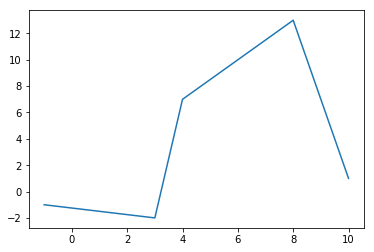

In [7]:
plt.plot(x, f)
plt.show()

<!--
Note that `x` and `f` are lists, but they could be any ordered array-like structure, e.g. tuple or NumPy array. 

We can improve the plot by adding axis labels, a title and dots to indicate data points.
-->

注意，`x`和`f`是列表，但它们可以是任何有序的类似阵列的结构，例如 元组或NumPy数组。

我们可以通过添加轴标签，标题和点来改善绘图，以指示数据点。

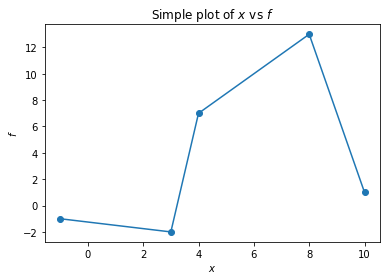

In [8]:
# Plot data with a line and dots at the data points (this is what '-o' does)
plt.plot(x, f, '-o')  

# Attach labels and title (using LaTeX syntax)
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.title("Simple plot of $x$ vs $f$")
plt.show()

<!--
To change the colour of the line to red and use crosses at the data points, and to save the
plot to the file `my-plot.png`, we can do the following:
-->

要将线的颜色更改为红色，并在数据点处使用十字形，并将绘图保存到文件“my-plot.png”，我们可以执行以下操作：

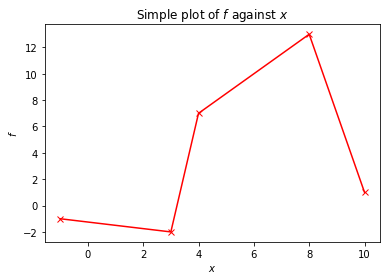

In [9]:
# Plot data with a red solid line and crosses at the data points (this is what '-xr' does)
plt.plot(x, f, '-xr')

# Attach labels and title
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.title("Simple plot of $f$ against $x$")

# Save plot to file
plt.savefig("my-plot.pdf")
plt.show()

<!--
Upon executing the notebook, the file `my-plot.png` should appear in the same directory as the notebook.
You could use the file to include the plot in a document or presentation.
-->

执行笔记本时，文件`my-plot.png`应出现在与笔记本相同的目录中。 您可以使用该文件将图表包含在文档或演示文稿中。

<!--
# Plotting mathematical functions of one variable

Line plots of a mathematical function are created by evaluating the function at a large number of points. If we use enough points, the graph of a function will appear smooth.

To plot the function:

$$
f(x) = \sin(x)
$$

the first step is to create an array of values at which we want to evaluate the function. We can use the NumPy function `linspace` to do this: 
-->

# 绘制一个变量的数学函数

通过在大量点来创建数学函数的线图。 如果我们使用足够的点，函数的图形将显得平滑。

绘制函数：

$$
f（x）= \ sin（x）
$$

第一步是创建一个数组，我们要在其中评估函数。 我们可以使用NumPy函数`linspace`来做到这一点：

In [10]:
num_points = 100
x = np.linspace(0, 4*np.pi, num=num_points)

<!--
The above creates a NumPy array with `num_points` equally spaced values between $0$ and 
$4 \pi$, including the end points. We can check this for a smaller example: 
-->

上面创建了一个NumPy数组，其中`num_points`的间隔值介于$ 0 $和$ 4 \ pi $之间，包括终点。 我们可以查看一个更小的例子：

In [11]:
print(np.linspace(0, 2, num=10))

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


<!--
To evaluate $\sin(x)$ for each value in the array `x`, we use the NumPy `sin` function, which can be applied entry-wise to `x`:
-->

为了计算数组`x`中每个值的 $\sin(x)$ ，我们使用NumPy`sin`函数，它可以应用于每一个`x`：

In [12]:
f = np.sin(x)

<!--
We can now plot `f` against `x`.
-->

我们现在可以画出f(x)

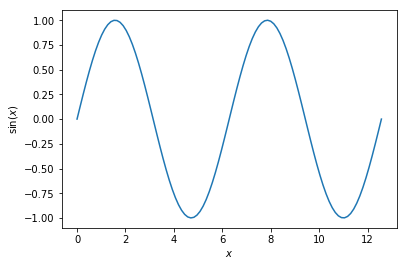

In [13]:
plt.plot(x, f)
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')
plt.show()

<!--
We can improve the appearance of the plot by specifying the $x$ limits:
-->

我们可以通过指定 $x$ 的范围来改善绘图的外观：

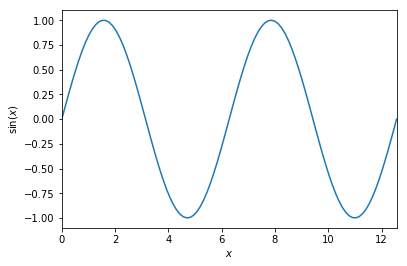

In [14]:
# Plot the graph
plt.plot(x, f)

# Label the axis
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')

# Use the start and end values in x as x limits (recall that x[-1] 
# returns the last value in x)
plt.xlim(x[0], x[-1])

plt.show()

<!--
To plot two functions on one graph, we use `plt.plot` twice:
-->

要在一个图上绘制两个函数，我们使用两次 `plt.plot` ：

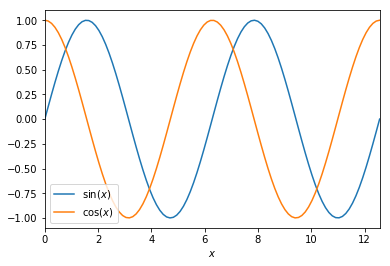

In [15]:
x = np.linspace(0, 4*np.pi, num=100)

# Plot sin(x) and cos(x), and add label for each
plt.plot(x, np.sin(x), label="$\sin(x)$")
plt.plot(x, np.cos(x), label="$\cos(x)$")

# Label the x-axis
plt.xlabel('$x$')

# Add legend
plt.legend()

# Use the start and end values in x as x limits
plt.xlim(x[0], x[-1])

plt.show()

<!--
# Bar charts and histograms
-->

# 柱状图和直方图

<!--
## Bar charts

The numbers of students in each year of the Engineering Tripos, and graduate students are:
-->

## 柱状图
Engineering Tripos每年的学生人数和研究生人数为：

In [16]:
cohort = ('IA', 'IB', 'IIA', 'IIB', 'Graduate')
num_students = (332, 270, 256, 238, 451)

<!--
We want to represent these figures using a bar chart:
-->

我们想用柱状图来表示这些数字：

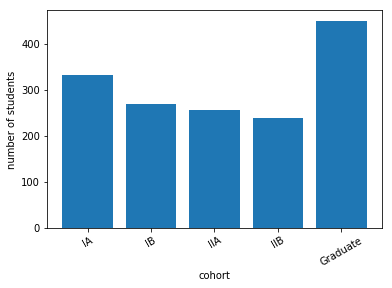

In [17]:
# Create an array with the position of each bar along the x-axis, e.g [0, 1, 2, 3, 4] 
x_pos = np.arange(len(cohort))

# Produce bar plot
plt.bar(x_pos, num_students, align='center');

# Replace the x ticks with the Tripos name, and rotate labels 30 degrees
plt.xticks(x_pos, cohort, rotation=30)

# Add axis labels 
plt.xlabel('cohort')
plt.ylabel('number of students')

plt.show()

<!--
## Histograms

To create a histogram we first need a data set. We will use 4000 random values drawn from a normal (Gaussian) distribution with zero mean and standard deviation of one. We can use NumPy to create such an array using:
-->

## 直方图

要创建直方图，我们首先需要一个数据集。 我们将使用从正态（高斯）分布绘制的4000个随机值，其中均值为0并且标准差为1。 我们可以使用NumPy创建这样一个数组：

In [18]:
# loc=mean, scale=stddev, size=num samples
x = np.random.normal(loc=0.0, scale=1.0, size=5000)  

<!--
We can visualise the distribution of the values using a histogram.
A histogram works by collecting data into intervals (bins) along the horizontal axis. 
The number of values that fall within a 'bin' is then displayed on the vertical axis.
Using 20 bins, we can visualise how `x` is distributed:
-->

我们可以使用直方图看看数值的分布。
直方图沿水平轴将数据收集到分档(bins)中。
然后，在垂直轴上显示落入'bin'内的值的数量。
使用20个bin，我们可以看到`x`是如何分布的：

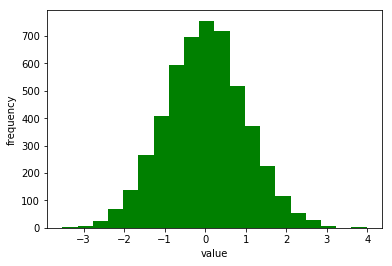

In [19]:
# Produce histogram with 20 bins (try changing the number of bins)
n, bins, patches = plt.hist(x, 20, facecolor='green');

# Add label
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

<!--
Matplotlib has automatically created 20 bins of equal width, and computed the number of entries in each bin. We can inspect the bin intervals
-->

Matplotlib已自动创建了20个宽度相等的bins，并计算了每个bin中的条目数。 我们可以检查bin间隔

In [38]:
print(bins)

[-3.52492453 -3.14963953 -2.77435453 -2.39906953 -2.02378453 -1.64849953
 -1.27321453 -0.89792954 -0.52264454 -0.14735954  0.22792546  0.60321046
  0.97849546  1.35378046  1.72906546  2.10435046  2.47963545  2.85492045
  3.23020545  3.60549045  3.98077545]


<!--
And the number of values in each bin:
-->

和每个bin中的值的数量：

In [39]:
print(n)

[0.00213171 0.00426343 0.01279028 0.03677205 0.07407704 0.141226
 0.21796768 0.31602649 0.3709181  0.4028938  0.38264253 0.27605686
 0.1977164  0.11937594 0.06235261 0.02877813 0.01438906 0.00266464
 0.00053293 0.00106586]


<!--
We can mix plot types on a single graph - in the case of a histogram it can be useful to compare against
a probability density function. Since we drew the values in `x` from a normal distribution, we expect a normal probability distribution function to be a good fit. Let's test.

We can use the module `scipy.stats` to compute the normal probability distribution function. To compare the histogram to a probability density function, the histogram needs to be 'normalised' 
(so the integral is equal to 1).
-->

我们可以在单个图形上混合绘图类型 - 在直方图的情况下，与概率密度函数进行比较可能很有用。 由于我们从正态分布中提取了“x”中的值，我们期望正态概率分布函数是一个很好的拟合。 我们来试试吧。

我们可以使用模块`scipy.stats`来计算正态概率分布函数。 要将直方图与概率密度函数进行比较，直方图需要“标准化”
（所以积分等于1）。

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/Users/goldengrape/anaconda3/envs/blog/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


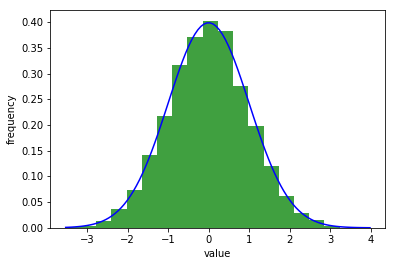

In [40]:
# Import norm from SciPy stats module to compute norm probability distribution function
from scipy.stats import norm

# Plot normed histogram of data
n, bins, patches = plt.hist(x, 20, normed=1.0, facecolor='green', alpha=0.75);

# Create array of 100 equally spaces points, stating from the first value in the bins
# through to the last values in the bins
xf = np.linspace(bins[0], bins[-1], 100)

# Evaluate normal probability density function (pdf) at each xf
f = norm.pdf(xf)

# Create line plot of normal probability distribution function (blue line)
plt.plot(xf, f, 'b')

# Add labels
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

<!--
Experiment with the histogram plots by changing the number of samples and the number of bins.
-->

通过更改样本数和箱数来进行直方图实验。

<!--
# Pie charts

At the time of the 2011 census, the population of Cambridgeshire by district was:

District              | Population
---------------------:|------------:
Cambridge City        | 123900
East Cambridgeshire   | 83800
Fenland               | 95300
Huntingdonshire       | 169500
South Cambridgeshire  | 148800

As part of a presentation to the Cambridge City council, we need to produce
a pie chart of the Cambridgeshire population by district, indicating the percentage of
residents in each district and highlighting the Cambridge City 'slice'.

To do this, we first enter the data into tuples :
-->

# 饼状图

在2011年人口普查时，按地区划分的剑桥郡人口为：

区| 人口
---------------------:|------------:
剑桥市|123900
东剑桥郡|83800
Fenland|95300
Huntingdonshire |169500
南剑桥郡|148800

作为向剑桥市议会的介绍的一部分，我们需要制作
按地区划分的剑桥郡人口饼图，显示每个地区居民的百分比
并突出剑桥市'切片'。

为此，我们首先将数据输入元组：

In [41]:
district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)

<!--
Tuples are appropriate because the number of districts is fixed (recall that we can't change the length of a tuple).

We next produce a colour pie chart:
-->

元组是合适的，因为区域的数量是固定的（回想一下，我们不能改变元组的长度）。

我们接下来会生成一个彩色饼图：

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

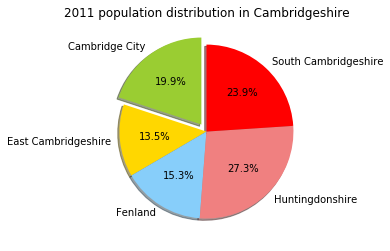

In [42]:
# Specify slice colours 
# (see http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

# "explode" the 1st slice (Cambridge City)
explode = (0.1, 0.0, 0, 0, 0)  

# Produce pie chart. The slices will be ordered and plotted counter-clockwise.
plt.pie(population, explode=explode, labels=district, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Add title
plt.title("2011 population distribution in Cambridgeshire")

plt.show()

<!--
# Interactive plots

Interactive plots are great ways to explore the influence of parameters on a response.
As a simple example, we want to plot

$$
f(t) = t^{\alpha} \sin(\omega t)
$$

where $\alpha$ and $\omega$ are parameters. We would like to explore interactively the
influence of the two parameters.
-->

# 交互式图

交互式图是探索参数对响应的影响的好方法。
举个简单的例子，我们想绘图

$$
f(t) = t^{\alpha} \sin(\omega t)
$$

其中$\alpha$和$\omega$ 是参数。 我们想以互动方式探索
这两个参数的影响。

<!--
## Installing widget extensions

Interactive plots be can created using the interactive widgets module `ipywidgets`. 
Interactive widgets have been configured for you  on https://notebooks.azure.com/.
To install the widgets on your own computer, follow the instructions at https://ipywidgets.readthedocs.io/en/latest/user_install.html.
-->

## 安装widget扩展

可以使用交互式小部件模块`ipywidgets`创建交互式图。
已在https://notebooks.azure.com/ 上为您配置了交互式小部件。
要在您自己的计算机上安装小部件，请按照https://ipywidgets.readthedocs.io/en/latest/user_install.html 上的说明进行操作。

译者注：下面的方式可能只能在jupyter notebook上运行成功，在jupyterlab上可能有其他的方式，例如使用`%matplotlib widget`

<!--We first import a function from the `ipywidgets` module:-->

我们首先从`ipywidgets`模块导入一个函数：

In [43]:
from ipywidgets import interact

<!--
## Creating interactive plots

To create an interactive plot, we need to encapsulate our plot code inside a function, with the plot parameters as arguments to the function:
-->

## 创建交互式图

要创建交互式绘图，我们需要将绘图代码封装在函数中，并将绘图参数作为函数的参数：

In [44]:
def plot(ω=1, α=0):
    t = np.linspace(0, 2*np.pi, 200)
    plt.xlabel('$t$')
    plt.ylabel('$f$')
    plt.title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω))
    plt.plot(t, (t**α)*np.sin(ω*t))
    plt.show()

<!--
(Remember, to get $\omega$ and $\alpha$ use `\omega` + `Tab` key and `\alpha` + `Tab` key.)
We have used default function arguments - these will be the initial parameters for out interactive plot.

Next, we use the `interact` function, passing to it the name of our function that does the plotting 
(`plot` in this case), and a tuple for each parameters:
-->

（记住，要获得$\omega$和 $\alpha$ 使用`\omega` + `Tab`键和`\alpha` + `Tab`键。）
我们使用了默认函数参数 - 这些参数将是交互式绘图的初始参数。


接下来，我们使用`interact`函数，向它传递我们执行绘图的函数的名称（在本例中为`plot`），以及每个参数的元组：

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

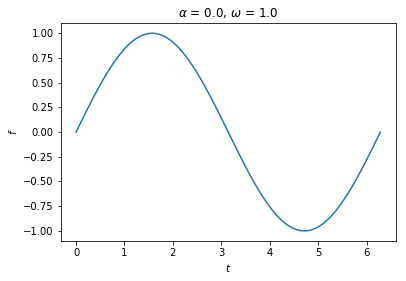

In [45]:
interact(plot, ω=(-10, 10, 0.25), α=(0, 2, 0.25));

<!--
If you have interactive widgets working, you should see two sliders above the plot that you can adjust.
The plot should dynamically change.

The tuple for each parameters has the form `(end_point0, end_point1, step_size)` for the slider.
-->

如果您的交互式小部件正常工作，您应该看到可以调整的图上方的两个滑块。绘图应该动态变化。

每个参数的元组具有滑块的形式`（end_point0，end_point1，step_size）`。

<!--
## Advanced interactive plot creation (optional)

There is a compact way of constructing interactive plots using function *decorators*. Decorators are not required for this course, so this section is optional. If you are interested, you can find lots of information on decorators online.

Below is the interactive plot example constructed using a decorator. 
-->

## 高级交互式绘图 （可选）

有一种使用函数*装饰器*构建交互式绘图的简洁方法。 本课程不要求装饰器，因此本部分是可选的。 如果您有兴趣，可以在线找到有关装饰器的大量信息。

下面是使用装饰器构建的交互式绘图示例。

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

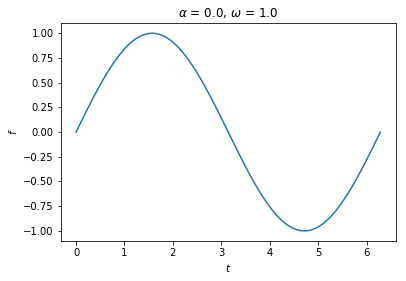

In [46]:
@interact(ω =(-10, 10, 0.25), α=(0, 2, 0.25))
def plot(ω=1, α=0):
    t = np.linspace(0, 2*np.pi, 200)
    plt.xlabel('$t$')
    plt.ylabel('$f$')
    plt.title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω))
    plt.plot(t, (t**α)*np.sin(ω*t))
    plt.show()

<!--
The decorator
```python
@interact(ω =(-10, 10, 0.25), α=(0, 2, 0.25))
```
is a 'shortcut' that creates the line
```python            
interact(plot, ω=(-10, 10, 0.25), α=(0, 2, 0.25))
```    
for us.
-->

装饰器
```python
@interact(ω =(-10, 10, 0.25), α=(0, 2, 0.25))
```
是一个创建线条的捷径
```python            
interact(plot, ω=(-10, 10, 0.25), α=(0, 2, 0.25))
```    

<!--
# Contour plots

Consider the function of two variables:

$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right)
$$

It is not easy to visualise the form of this function. One way to visualise the function is to create a contour plot. To do this, we first create points in the $x$ and $y$ directions at which we want to evaluate the function: 
-->

# 等高线图

考虑两个变量的函数：

$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right)
$$

想象这个函数的形式并不容易。 可视化该函数的一种方法是创建等高线图。 为此，我们首先在$x$和$y$方向创建我们要评估函数的点：

In [47]:
N = 50  # 50 points in each direction
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)

<!--
Next, we use NumPy to create a 'grid' of $(x, y$) points: 
-->

接下来，我们使用NumPy创建$(x, y$) 点的“网格”：

In [48]:
X, Y = np.meshgrid(x, y)

<!--
If you want to explore what `meshgrid` returns, try making `N` smaller and printing `X` and `Y` to the screen.

We now evaluate the function $f$ at each point:
-->

如果你想探索`meshgrid`返回的内容，请尝试缩小`N`并在屏幕上打印`X`和`Y`。

我们现在在每个点评估函数$ f $：

In [49]:
f = np.sin(X)*np.cos((X*Y**2)/10)

<!--
and then create a filled contour plot using `plt.contourf`:
-->

然后使用`plt.contourf`创建一个填充的等高线图：

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

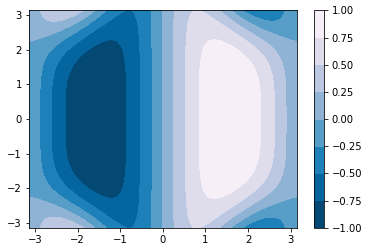

In [50]:
plt.contourf(X, Y, f,  cmap=matplotlib.cm.PuBu_r)
plt.colorbar()  # Add colour bar (legend)
plt.show()

<!--
Above, we have chosen a built-in Matplotlib colour map (`matplotlib.cm.PuBu_r`). Without passing the `cmap` argument we would have seen the default colour map, which is `matplotlib.cm.jet` (and which is ugly).

To create a contour map using contour lines:
-->

上面，我们选择了一个内置的Matplotlib颜色图（`matplotlib.cm.PuBu_r`）。 如果不传递`cmap`参数，我们就会看到默认的颜色映射，即`matplotlib.cm.jet`（这很难看）。

要使用轮廓线创建等高线图：

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

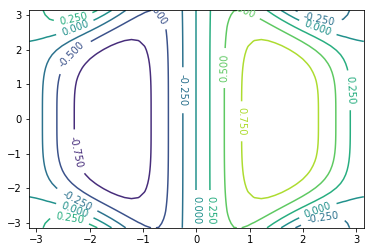

In [51]:
# Plot
p = plt.contour(X, Y, f)

# Add contour labels
plt.clabel(p, inline=1)

plt.show()

<!--
There is more we could do, for example controlling the numbers of contour lines.
-->

我们可以做更多的事情，例如控制轮廓线的数量。

<!--
# Three-dimensional plot (optional)

*This is an advanced example. Skip over this if you wish.*

Another way to represent a function of two variables is to use a three-dimension plot, with axes for $x$, 
$y$, and $f$. Plotting in three dimensions is considerably more complex that in two dimensions.

To create a three-dimensional plot, we need to import some extra modules from Matplotlib:
-->

# 三维图（可选）

*这是一个高级示例。 如果您愿意，可以跳过这个。*

表示两个变量函数的另一种方法是使用三维图，轴为$ x $，$ y $和$ f $。 三维绘图在二维方面要复杂得多。

要创建三维图，我们需要从Matplotlib导入一些额外的模块：

In [52]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

AttributeError: module 'matplotlib.axis' has no attribute '_make_getset_interval'

<!--
The below plots the function $f(x, y)$ in three-dimensions:
-->

下面绘制了三维函数$ f（x，y）$：

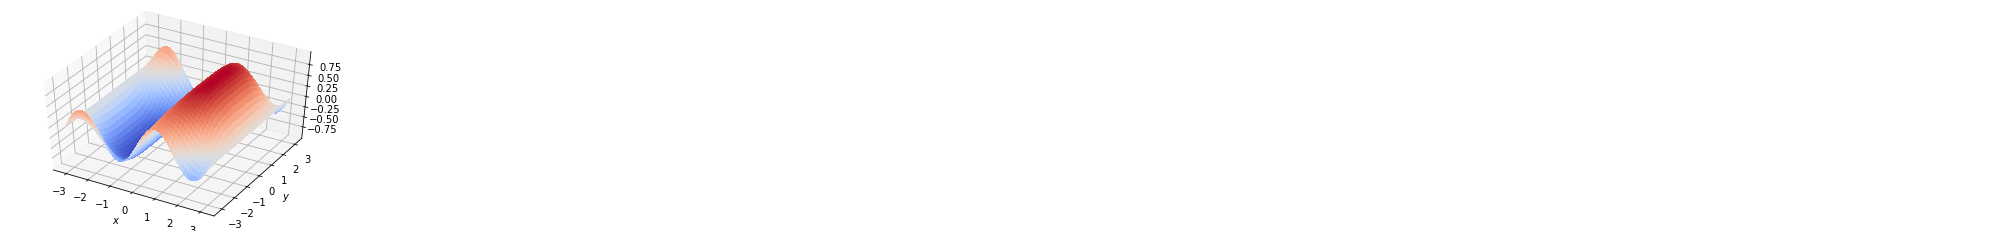

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, f, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
                                              
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.view_init(elev=45)

plt.show()

<!--
# Plotting data from online resources - stock data

It is becoming increasingly common to fetch data from the Internet for processing and plotting, and more and more data is being made available, especially government data.

To start, we will plot the Rolls Royce stock price over recent years. To fetch financial data, the library
`quandl` (https://www.quandl.com/tools/python) is helpful. It was installed at the top this
notebook. We first import the module:
-->

# 从在线资源中绘制数据 - 股票数据

从互联网上获取数据进行处理和绘图越来越普遍，越来越多的数据可用，尤其是政府数据。

首先，我们将绘制近年来劳斯莱斯股票价格。要获取财务数据，库`quandl`（https://www.quandl.com/tools/python） 会很有帮助。 它的安装过程在此笔记本的前面已经描述。 我们先导入模块：

In [36]:
import quandl

<!--
We then fetch the Rolls Royce stock prices on the London Stock Exchange:
-->

然后我们在伦敦证券交易所取得劳斯莱斯股票价格：

In [37]:
rr_stock_data = quandl.get("LSE/RR", returns="numpy")  # "LSE/RR" is the code on quandl for the Rolls Royce stock price 

<!--
We now have `rr_stock_data` as a special type of NumPy array called a `recarray` (http://docs.scipy.org/doc/numpy/reference/generated/numpy.recarray.html):
-->

我们现在将`rr_stock_data`作为一种特殊类型的NumPy数组，称为`recarray`（http://docs.scipy.org/doc/numpy/reference/generated/numpy.recarray.html）：

In [38]:
print(type(rr_stock_data))

<class 'numpy.recarray'>


<!--
A `recarray` is a two-dimensional array for which we can extract columns by an associated name. We can check the names using `recarray.dtype`:
-->

`recarray`是一个二维数组，我们可以通过相关名称提取列。 我们可以使用`recarray.dtype`检查名称：

In [39]:
print(rr_stock_data.dtype)

(numpy.record, [('Date', '<M8[ns]'), ('Price', '<f8'), ('High', '<f8'), ('Low', '<f8'), ('Volume', '<f8'), ('Last Close', '<f8'), ('Change', '<f8'), ('Var%', '<f8')])


<!--
Extracting the `Date` and `Price` columns, we can plot the Rolls Royce stock price over time:
-->

提取`Date` 和 `Price`列，我们可以绘制劳斯莱斯股票价格随时间变化：

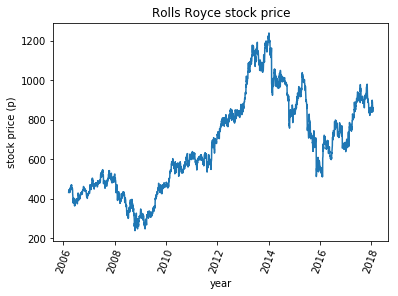

In [40]:
# Plot the stock price
plt.plot(rr_stock_data['Date'], rr_stock_data['Price'])

# Add axis labels and plot title
plt.ylabel("stock price (p)")
plt.xlabel("year")
plt.title("Rolls Royce stock price")

# Rotate the year tick labels
plt.xticks(rotation=70)

plt.show()

<!--
Similarly, we can plot the trading volume (in thousands):
-->

同样，我们可以绘制交易量（以千计）：

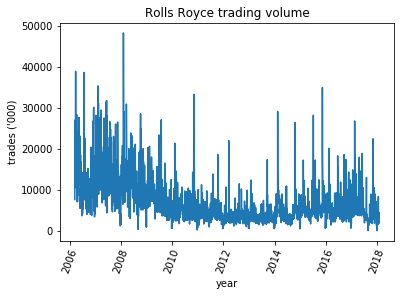

In [41]:
plt.plot(rr_stock_data['Date'], rr_stock_data['Volume']/1000.0)
plt.ylabel("trades ('000)")
plt.xlabel("year")
plt.title("Rolls Royce trading volume")
plt.xticks(rotation=70)

plt.show()

<!--
# Exercises

Complete now the [08 Exercises](Exercises/08%20Exercises.ipynb) notebook.
-->

# 练习

现在完成[08 练习](Exercises/08%20Exercises.ipynb)